In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Uklanjanje intuitivno irelevantnih podataka

In [4]:
df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Pronalazenje nepostojecih (NaN) vrednosti

In [5]:
#iz df.info() sam videla da samo 'Age', 'Cabin' i 'Embarked' imaju NaN vrednosti i da je ukupan broj vrsta 891
#ovako cu preglednije videti kome sta fali
print(df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Resavanje nepostojecih vrednosti

In [6]:
#za 'Age' fali 177/891 sto je malo ali ne toliko da me nece kostati da samo obrisem redove u kojima je NaN za godine
#s druge strane, ne mogu da obrisem tu kolonu jer je verovatnije da prezivi neko ko ima 17 godina nego neko ko ima 70
#prethodno mogu i kodom da ustanovim: (samo je jedan takav :(  
df[(df['Survived'] == 1) & (df['Age'] > 70)]

#resavam NaN 'Age' problem menjanjem svih nepostojecih vrednosti prosekom godina
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace = True)

#provera uspesnosti:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
#resavanje 'Embarked' NaN podataka: posto ih je samo 2/891 nece me kostati da uklonim te vrste
df = df[~df['Embarked'].isna()]
print(f'Broj vrsta je sada: {len(df)}')

#provera uspesnosti:
df.isna().sum()

#takodje vidimo da se broj NaN podataka u koloni 'Cabin' nije smanjio tako da je sada 687/889 sto je jos veci procenat

Broj vrsta je sada: 889


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [8]:
#resavanje 'Cabin' NaN vrednosti;
#posto je u pitanju ogroman procenat podataka, ne mogu da obrisem vrste koje imaju NaN u koloni 'Cabin'
#mogu da obrisem tu kolonu, ukoliko ona nije znacajna za ishod
#intuitivno, mozda pocetno slovo naziva kabine oznacava da li je kabina u potpalubi ili na visim spratovima, sto mozda nije zanemarivo
#proveravam hipotezu:
df['Cabin'].nunique() 
#broj jedinstveno oznacenih kabina je 146
#broj kabina koje su oznacene je 889 - 687 = 202 i medju njima ima ukupno 202 - 146 = 56 ponavljanja
#prethodno mi govori da verovatno kabina nema ogroman znacaj na ishod, ali provericu jos malo

#proveravam iz koje kabine najcesce dolaze ljudi koji su preziveli
print(df[df['Survived'] == 1]['Cabin'].mode())
len(df[(df['Survived'] == 1) & (df['Cabin'] == 'B96 B98')])

#u pitanju je samo 4 osobe, dakle kabina sigurno nije znacajna za prezivljavanje ==> mogu da brisem kolonu 'Cabin'
df.drop(['Cabin'], axis = 1, inplace = True)

#provera ishoda:
df.isna().sum()

0    B96 B98
Name: Cabin, dtype: object


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Pretvaranje kategorickih karakterizacija u numericke

In [10]:
#proveravam koliko koji feature ima kategorija
df.nunique()

#primetimo, 'Age' i 'Fare' ne treba pretvarati jer su numericke vrednosti
#nije efikasno praviti 247 ili 89 kategorija, pa ih tako ni ne tretiram
#'Survived' je ground truth tako da ne zelim da razdvajam i ne tretiram kao kategoriju
categories = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def get_all_dummies(df, categories):
    #pajton sve prosledjuje po referenci, ne zelim da poremetim izvorni df pa pravim kopiju koju nadalje koristim
    df_cpy = df.copy()
    for category in categories:
        dummy = pd.get_dummies(df_cpy[category], columns = [category], prefix = category)
        #izbacujem referencnu kategoriju
        without_reference_category = dummy.drop([dummy.columns.values[-1]], axis = 1)
        #brisem iz izvornog neobradjenu kategoriju
        df_cpy.drop([category], axis = 1, inplace = True)
        #dodam kodiranu kategoriju
        df_cpy = pd.concat([df_cpy, without_reference_category], axis = 1)
   
    return df_cpy

df_encoded = get_all_dummies(df, categories)
df_encoded.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_C,Embarked_Q
0,0,22.0,7.2500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
#sve kolone su numericke, sad treba da vidim sta je povezano sa ishodom pre nego sto istreniram model

Biranje features-a koji nisu usko povezani

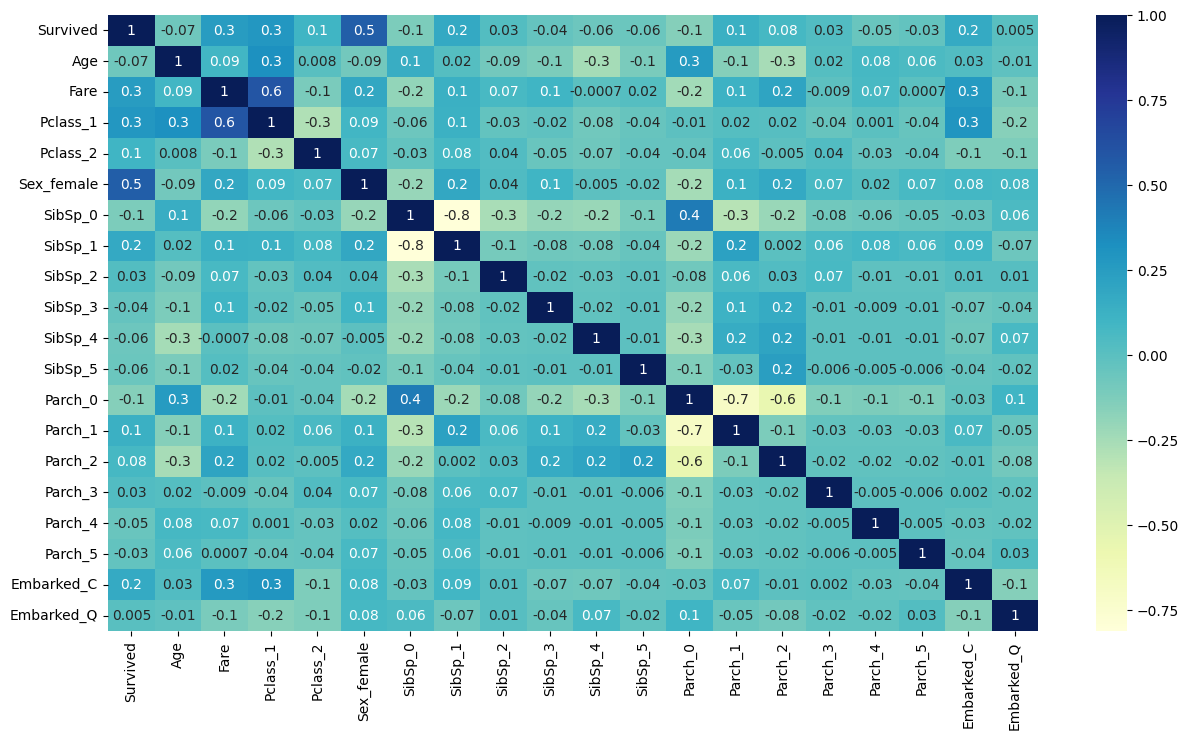

In [12]:
#df_encoded.corr() je nepregledno
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
corr = df_encoded.corr()
cov = df_encoded.cov()
heatmap = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt='.1g', xticklabels = True)

In [13]:
#vidimo da su 'Pclass_1' i 'Fare' usko povezani (0.6/1) sto znaci da treba eliminisati ili Pclass_1/2 ili Fare
#lakse je modelu da trenira sa 'Fare' (jedinstven opis) nego sa Pclass_1 i Pclass_2 koji su iz iste izvorne kategorije
#odbacujem Pclass_1 i Pclass_2 jer su iz iste izvorne kategorije a Pclass_1 je usko povezan sa Fare
df_encoded.drop(['Pclass_1', 'Pclass_2'], axis = 1, inplace = True)
df_encoded.head()

,Survived,Age,Fare,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_C,Embarked_Q
0,0,22.0,7.2500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,26.0,7.9250,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Razdvajanje DataFrame-a na ground truth i features; na train i dev/test set

In [14]:
df_labels = df_encoded[['Survived']]
df_features = df_encoded.drop(['Survived'], axis = 1)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

labels = df_labels.to_numpy().astype(float).ravel()
features = df_features.to_numpy().astype(float)

train, dev, train_labels, dev_labels = train_test_split(features, labels, stratify = labels, random_state = 42, test_size = 0.2)

Standardizacija vrednosti

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
dev = scaler.transform(dev)

Treniranje Logistic Regression modela

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, penalty = 'none')
model.fit(train, train_labels)
dev_predictions = model.predict(dev).round()

Evaluacija modela na osnovu test_predictions i test_labels

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(f'Accuracy: {100*accuracy_score(dev_labels, dev_predictions): .2f}%')
print(f'Precision: {100*precision_score(dev_labels, dev_predictions): .2f}%')
print(f'Recall: {100*recall_score(dev_labels, dev_predictions): .2f}%')

Accuracy:  79.78%
Precision:  78.57%
Recall:  64.71%


Konacno testiranje modela i kreiraje Submission fajla

In [19]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
df_test_cpy = df_test.copy()
df_test_cpy.drop(["Name", "Ticket", 'Cabin'], axis = 1, inplace = True)
#df_test_cpy.isna().sum()

#df_test_cpy = df_test_cpy[~df_test_cpy['Fare'].isna()]
fare_mean = df_test_cpy['Fare'].mean()
df_test_cpy['Fare'].fillna(fare_mean, inplace = True)

test_age_mean = df_test_cpy['Age'].mean()
df_test_cpy['Age'].fillna(test_age_mean, inplace = True)

test_ids = df_test_cpy['PassengerId']
df_test_cpy.drop(['PassengerId'], axis = 1, inplace = True)

In [26]:
df_test_encoded = get_all_dummies(df_test_cpy, categories)
df_test_encoded.drop(['Pclass_1','Pclass_2', 'Parch_6'], axis = 1, inplace = True)

test = df_test_encoded.to_numpy().astype(float)
test = scaler.transform(test)
predictions = model.predict(test).round().astype(int)

In [27]:
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [29]:
filename = 'Titanic Submission 2.csv'

submission.to_csv(filename,index=False)

In [30]:
len(predictions)

418